### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 3  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en numpy
* Arboles de clasificación y regresión
* Algunas Redes neuronales básicas
* Ensamblados, Adaboost y Random Forest
* Nociones de clases desbalanceadas


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio *privado* en _Github_, al correo electrónico del ayudante (*<alvaro.valderrama.13@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2019 Tarea 3]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio.
* Fecha de entrega y presentaciones: 13 de Septiembre. Hora límite de entrega: 23:50. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Regresión para ubicación espacial  
[2.](#segundo) Clasificación con clases desbalanceadas    
[3.](#tercero) Clasificación en texto   

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ por ejemplo.

<a id="segundo"></a>
## 2. Clasificación con clases desbalanceadas

En las tareas de clasificación supervisada, buscamos que mediante los ejemplos etiquetados la maquina pueda aprender los atributos inerentes a las distintas clases. Sin embargo, en muchos casos reales de clasificación, la cantidad de ejemplos de cada clase son muy dispares, en cuyo caso hablamos de clases desbalanceadas. Si uno no aplica estrategias para compensar este problema, la maquina aprenderá muy bien las caracteristicas de la clase más representada pero no logrará extraer información generalizable de la clase menos representada. Además, debemos tener cuidado al momento de interpretar las distintas métricas a las cuales tenemos acceso, pues debemos tomar en cuenta el balance de las clases y la naturaleza del problema para evaluar realmente que tan bueno es el desempeño. 



Para esta parte de la tarea utilizaremos el siguiente _dataset_ publicado en Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud. Este conjunto de datos contiene unos 285000 ejemplos de transacciones con tarjetas de crédito reales, realizadas en 2013 por clientes europeos. Los datos son totalmente anónimos y son el resultado de un PCA a partir de los datos originales excepto por las columnas `Time` con el tiempo en segundos desde la primera transacción, `Amount` con el monto de la transacción y `Class` que indica si la transacción es fraudulenta o no. La tarea en cuestión consiste en lograr predecir cuando una transacción es fraudulenta o no automaticamente, para así poder detenerla antes de que se termine. Sin embargo, por la naturaleza de las transacciones bancarias, este problema es desbalanceado, de hecho de los 285000 transacciones registradas, solo 492 son fraudulentas! A lo largo de esta pregunta pondremos en evidencia los problemas que se originan de este desbalance de clases y trataremos de dar luces a algunas herramientas que nos permitan sortear esos problemas y como medir realmente el desempeño en esta clase de problemas. 

#### 2.a Carga de datos
Descargue los datos y cárguelos usando pandas. Haga una exploración rápida de los datos, cuantos datos hay, como se reparten sus valores.

Grafique la matriz de correlación, a primera vista parece relevante mantener la columna `Time`? En su opinión, conociendo la naturaleza del problema le parece relevante esa información para predecir el _target_?

Cuantos ejemplos hay de cada clase? Son las clases desbalanceadas efectivamente? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data_pregunta2/creditcard.csv')

print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

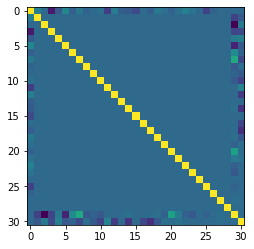

In [2]:
plt.imshow(df.corr())

In [3]:
df.loc[lambda x: x.Class != 0].shape

(492, 31)

In [4]:
df.loc[lambda x: x.Class == 0].shape

(284315, 31)

#### 2.b Ligero preprocesamiento

* Escale la columna `Amount`. Por qué es aconsejable realizar esto? Le parece necesario realizarlo en el resto de las columnas? 

* Separe los atributos del _target_.

* Separe luego los datos en _Training set_ y _Validation set_, con un 20% de los datos como validación y el resto como _train_. Asegurese que se mantienen las proporciones de ejemplos de cada clase en ambos sets. 

* Qué ocurriría si por ejemplo todos los ejemplos de la clase 1 quedaran en el _validation set_, que haría cualquier máquina de aprendizaje al aprender solo con la clase 0?

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns[1:-1]]
y = df.Class

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_amount = StandardScaler()

scaler_amount.fit(X_train['Amount'].values.reshape(-1,1))

X_train['Amount'] = scaler_amount.transform(X_train['Amount'].values.reshape(-1,1))
X_val['Amount'] = scaler_amount.transform(X_val['Amount'].values.reshape(-1,1))


/home/diego/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/diego/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 2.c Regresor logístico

Entrene un regresor logístico con los datos obtenidos de la pregunta anterior y calcule su desempeño (_score_ por ahora) sobre los datos de validación. A priori le parece un buen desempeño? 

In [36]:
from sklearn.metrics import f1_score, accuracy_score
from IPython.display import HTML, display
import tabulate

def important_metrics(model_i, X_train, y_train, X_val, y_val):
    metrics = dict()
    metrics["Nombre Modelo"] = type(model_i).__name__
    metrics["Accuracy Training"] = accuracy_score(model_i.predict(X_train), y_train)
    metrics["Accuracy Validation"] = accuracy_score(model_i.predict(X_val), y_val)
    metrics["F1 Score Training"] = f1_score(model_i.predict(X_train), y_train)
    metrics["F1 Score Validation"] = f1_score(model_i.predict(X_val), y_val) 
    return metrics
    
def show_metrics(metrics, title):
    results = [("Medida", title)]
    for t in metrics.items():
        results.append(t)
    print(tabulate.tabulate(results, headers="firstrow"))
    #display(HTML(tabulate.tabulate(stump_results, tablefmt='html')))
    

In [46]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

metrics = important_metrics(logistic_model, X_train, y_train, X_val, y_val)
show_metrics(metrics, "Modelo Logístico")

Medida               Modelo Logístico
-------------------  ------------------
Nombre Modelo        LogisticRegression
Accuracy Training    0.9992143781957032
Accuracy Validation  0.9991046662687406
F1 Score Training    0.7340267459138188
F1 Score Validation  0.6871165644171779


In [52]:
logistic_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### 2.d _Always_ 0

Suponga un modelo le entrega como resultado en el conjunto de validación el siguiente `y_pred`. ¿Qué está haciendo este predictor? ¿Qué _score_ obtendría tal modelo sobre el conjunto de validación? ¿Le parece que el modelo tenga un buen desempeño? Concluya sobre la calidad del _accuracy_ que obtenemos con `.score` para evaluar el desempeño de estos modelos. 

In [20]:
from sklearn.metrics import f1_score, accuracy_score

y_pred = pd.np.zeros(y_val.shape)

ac_score_zeros = accuracy_score(y_pred, y_val)
f1_score_zeros = f1_score(y_pred, y_val)

print("ACCURACY ZEROS:", ac_score_zeros)
print("F1 SCORE ZEROS:", f1_score_zeros)

ACCURACY ZEROS: 0.9982795547909132
F1 SCORE ZEROS: 0.0


#### 2.e Matriz de confusión

Investigue un poco sobre los valores que conforman la matriz de confusión o _confusion matrix_. Comente sobre la significancia de los distintos valores para el problema en cuestión. 

Escriba una función que a partir de un modelo o de los valores predecidos por un modelo, grafique la matriz de confusión. 

In [5]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Grafique la matriz de confusión para la regresión logística realizada en el punto c y para los valores `y_pred` del punto d. Le parecen parecidos ahora ambos modelos? 

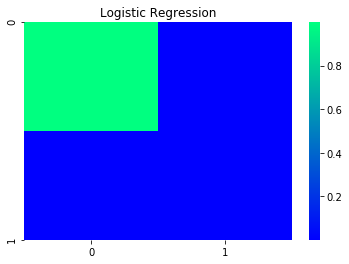

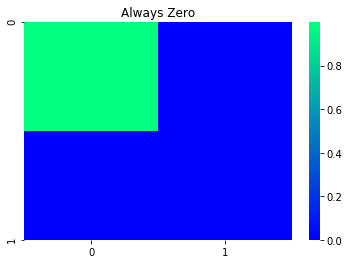

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

   
plt.title("Logistic Regression")
sns.heatmap(confusion_matrix(y_val, logistic_model.predict(X_val))/len(X_val),cmap='winter')    
plt.show()


y_pred = pd.np.zeros(y_val.shape)
plt.title("Always Zero")
sns.heatmap(confusion_matrix(y_val, y_pred)/len(y_val),cmap='winter')    
plt.show()

In [7]:
print(confusion_matrix(y_val, logistic_model.predict(X_val)))
print(confusion_matrix(y_val, y_pred))

[[56855     9]
 [   42    56]]
[[56864     0]
 [   98     0]]


#### 2.f Curva ROC
La curva ROC tiene bastante utilidad para evaluar la calidad de distintos modelos en estos casos. Investigue un poco sobre su significado para poder interpretarla correctamente y luego escriba una función que reciba un modelo entrenado y la grafíque. 

Note que `sklearn` trae implementado una función que entrega los puntos de la curva ROC, note eso sí que debe entregarle las probabilidades usando el método `predict_proba` del modelo entrenado. 

Para evaluar distintos modelos utilizará bastante las curvas ROC y la matriz de confusión, por lo que sería recomendable escribir una función que reciba un modelo y datos y realice tanto la curva ROC como la matriz de confusión, aunque escribir tal función no es requisito. 

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

def roc_curve_graph(model_i, title):
    fpr, tpr, _ = roc_curve(y_train, model_i.predict_proba(X_train)[:,1],pos_label=1)
    auc_score = roc_auc_score(y_train, model_i.predict_proba(X_train)[:,1])
    plt.figure(figsize=(10,6))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Roc Curve "+title+"\n"+"AUC SCORE = "+str(round(auc_score, 4)))
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1], linestyle="--")

Utilice la función definida para su modelo de regresión logística. Comente el gráfico obtenido. 

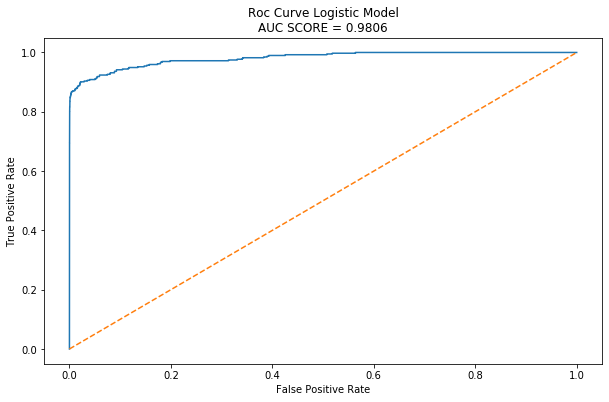

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

roc_curve_graph(logistic_model, "Logistic Model")

#### 2.g Arbol de Clasificación
Entrene un arbol de clasificación para tratar de resolver el problema. Pruebe unas cuantas profundidades máximas distintas y elija una. Si quiere puede modificar los otros hiperparámetros del modelo. 

Evalúe su desempeño respecto a los modelos lineales usando las métricas relevantes y compare su costo computacional. Discuta.

Medida               Tree Depth 3
-------------------  ----------------------
Nombre Modelo        DecisionTreeClassifier
Accuracy Training    0.9993504356031513
Accuracy Validation  0.9992802219023208
F1 Score Training    0.7932960893854749
F1 Score Validation  0.7657142857142857
Tiempo de cómputo    3.0122244358062744
Número de hojas      7
 
Medida               Tree Depth 4
-------------------  ----------------------
Nombre Modelo        DecisionTreeClassifier
Accuracy Training    0.9994338256270711
Accuracy Validation  0.9994382219725431
F1 Score Training    0.8313725490196079
F1 Score Validation  0.8315789473684211
Tiempo de cómputo    4.0099523067474365
Número de hojas      11
 
Medida               Tree Depth 5
-------------------  ----------------------
Nombre Modelo        DecisionTreeClassifier
Accuracy Training    0.9995874388290285
Accuracy Validation  0.9994908886626171
F1 Score Training    0.871584699453552
F1 Score Validation  0.8415300546448088
Tiempo de cómputo    4.7

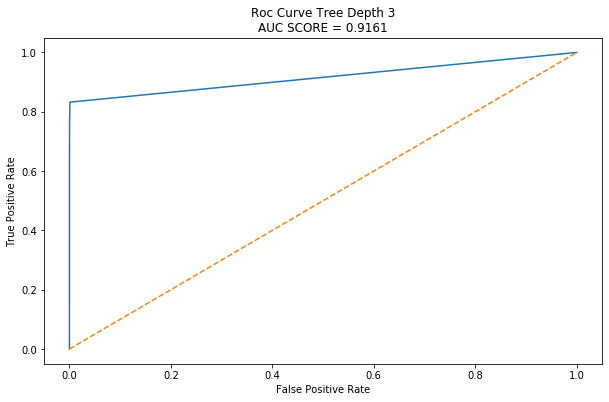

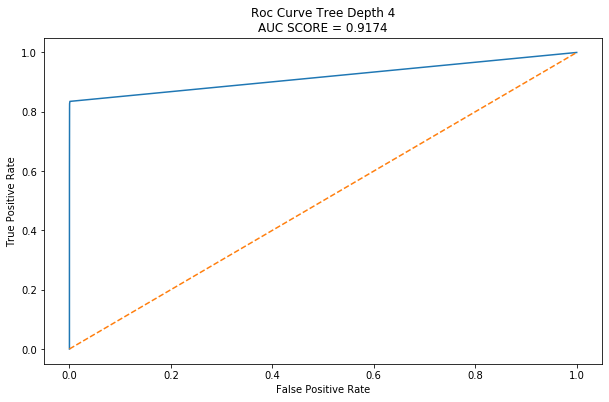

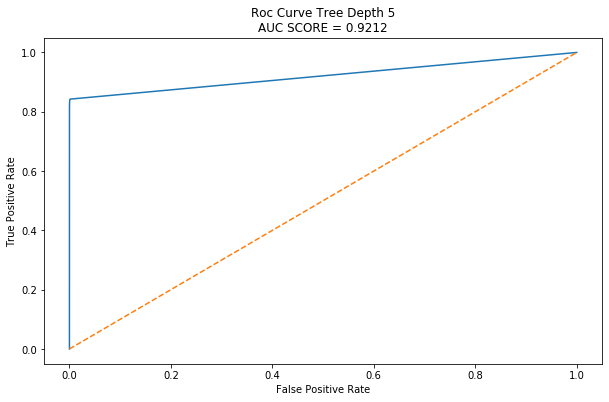

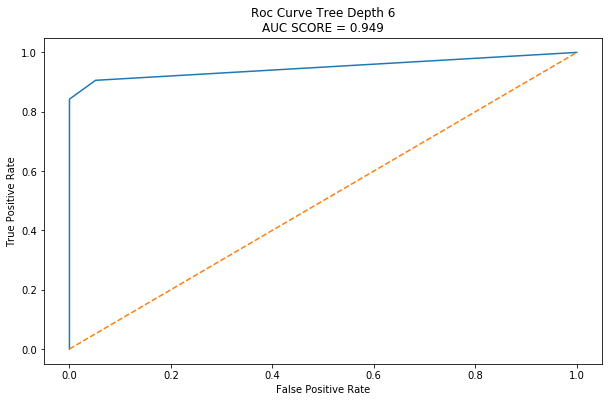

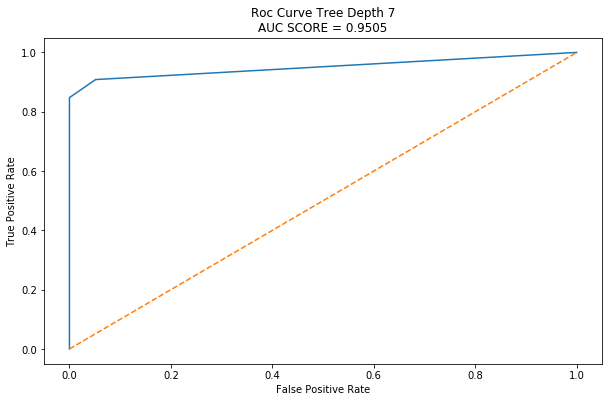

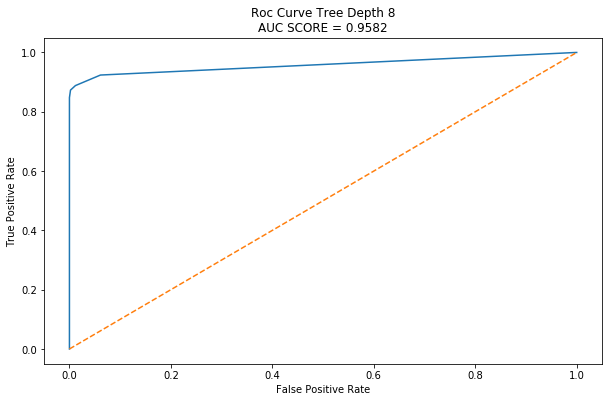

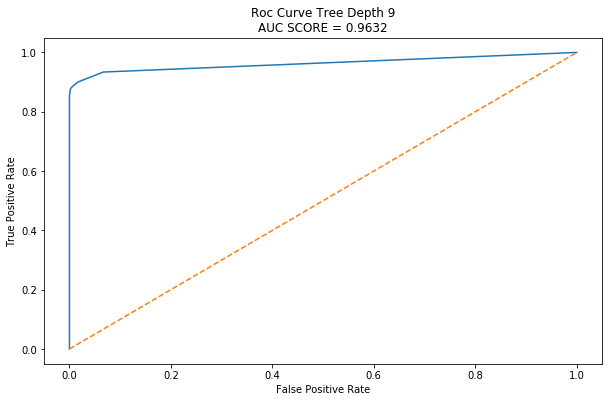

In [53]:
from sklearn.tree import DecisionTreeClassifier
import time

train_ac_scores = list()
train_f1_scores = list()
val_ac_scores = list()
val_f1_scores = list()

for i in range(3,10):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    start_time = time.time()
    tree.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    metrics = important_metrics(tree, X_train, y_train, X_val, y_val)
    metrics["Tiempo de cómputo"] = elapsed_time
    metrics["Número de hojas"] = tree.get_n_leaves()
    
    train_ac_scores.append(metrics["Accuracy Training"])
    train_f1_scores.append(metrics["Accuracy Validation"])
    val_ac_scores.append(metrics["F1 Score Training"])
    val_f1_scores.append(metrics["F1 Score Validation"])
    
    show_metrics(metrics, "Tree Depth "+str(i))
    print(" ")
    roc_curve_graph(tree, "Tree Depth "+str(i))

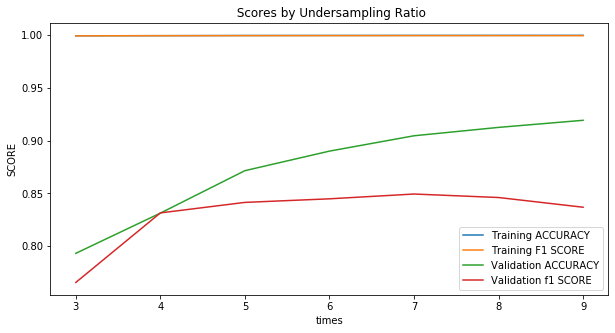

In [54]:
plt.figure(figsize=(10,5))

depths = list(range(3,10))
plt.plot( depths, train_ac_scores, label="Training ACCURACY") 
plt.plot( depths, train_f1_scores, label="Training F1 SCORE") 
plt.plot( depths, val_ac_scores, label="Validation ACCURACY") 
plt.plot( depths, val_f1_scores, label="Validation f1 SCORE")

plt.xlabel("times")
plt.ylabel("SCORE")
plt.title(" Scores by Undersampling Ratio")
plt.legend()
plt.show()

#### 2.h _Undersampling_

Considerando que la gran mayoría del aprendizaje se realiza en los ejemplos no fraudulentos, una aproximación para tratar de mejorar el desempeño de los modelos entrenados es simplemente reducir la cantidad de ejemplos de una clase para obtener nuevos conjuntos de datos con clases más balanceadas. Así, el aprendizaje se realiza de manera más balanceada entre ambas clases y se logran extraer mejor los atributos de cada clase. 

Complete la siguiente función para que realice un _undersampling_ de la clase 0 para obtener una proporción en el nuevo conjundo de datos de `times` veces el numero de transacciones normales frente a fraudulentas. Comente sobre la decisión del parámetro `replace` de la función `numpy.random.choice`. 


Note que la función debe recibir los datos de entrenamiento. Se pide que retorne un conjunto de datos de entrenamiento _undersampled_ para poder entrenar. Las validaciones deben realizarse sobre el conjunto de Validación original. 

In [43]:
def undersample(x_tr, y_tr, times = 10):
    fraud_indices = y_tr.index[y_tr == 1]
    normal_indices = y_tr.index[y_tr == 0]

    Count_Fraud_transaction = len(fraud_indices)
    
    undersample_index = pd.np.concatenate([
        pd.np.random.choice(
            normal_indices,
            Count_Fraud_transaction * times,
            replace = True# True or False?
                            ),
        fraud_indices])
    
    #undersample_index = pd.np.concatenate([fraud_indices,Normal_indices_undersample])
    undersampled_x = x_tr.loc[undersample_index]
    undersampled_y = y_tr.loc[undersample_index]
    
    return undersampled_x, undersampled_y

#### 2.i Entrenar con _Undersampling_

Pruebe distintos valores para el parámetro `times` y evalue si hay diferencias significativas en la curva ROC y la matriz de confución para el mismo árbol de clasificación entrenado anteriormente. Evidentemente el número de ejemplos de entrenamiento cambia a medida cambia el parámetro `times`, sin embargo nuestro interés no es que tan bien se comporta el modelo sobre los datos de entrenamiento si no sobre los de validación, los cuales deben ser constantes a lo largo del análisis.

¿Como se comparan estos modelos con el modelo con todos los datos (recuerde que las comparaciones deben hacerse calculando el desempeño sobre el conjunto de validación completo con el modelo una vez entrenado)? ¿Ve alguna ventaja en el uso de _undersampling_ frente al uso de todos los datos? 

Medida               Undersampling times 1
-------------------  -----------------------
Nombre Modelo        DecisionTreeClassifier
Accuracy Training    0.9543147208121827
Accuracy Validation  0.9518275341455708
F1 Score Training    0.9532467532467532
F1 Score Validation  0.06027397260273973
Tiempo de cómputo    0.011205911636352539
 
Medida               Undersampling times 2
-------------------  -----------------------
Nombre Modelo        DecisionTreeClassifier
Accuracy Training    0.9576988155668359
Accuracy Validation  0.9791264351673045
F1 Score Training    0.932975871313673
F1 Score Validation  0.12250922509225091
Tiempo de cómputo    0.011262893676757812
 
Medida               Undersampling times 3
-------------------  -----------------------
Nombre Modelo        DecisionTreeClassifier
Accuracy Training    0.9689086294416244
Accuracy Validation  0.9890979951546646
F1 Score Training    0.9338731443994601
F1 Score Validation  0.21092757306226173
Tiempo de cómputo    0.01576614379

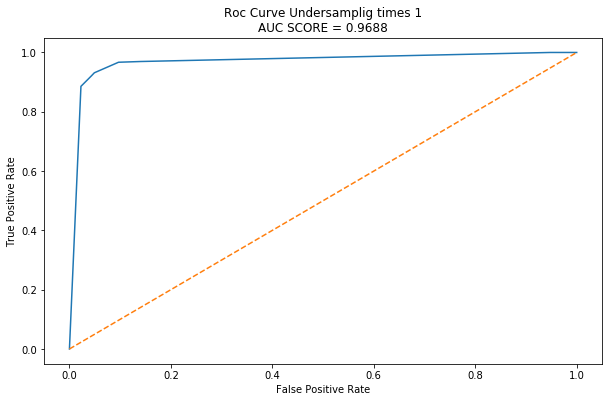

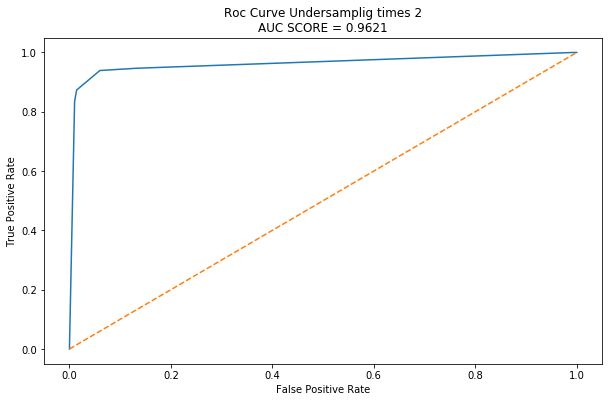

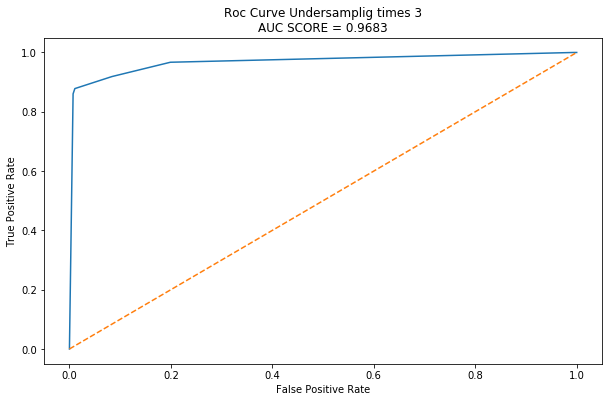

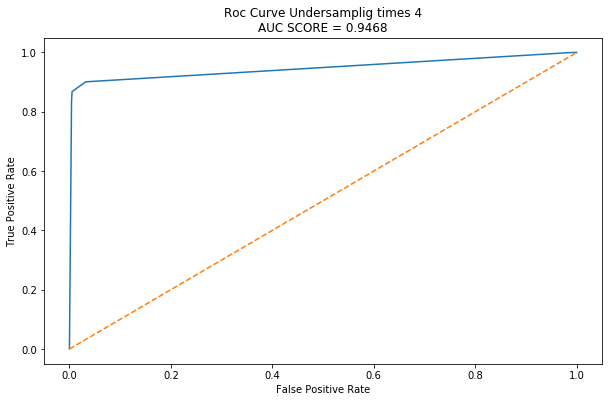

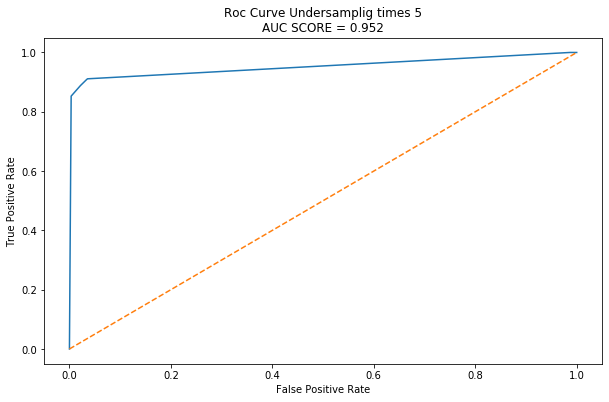

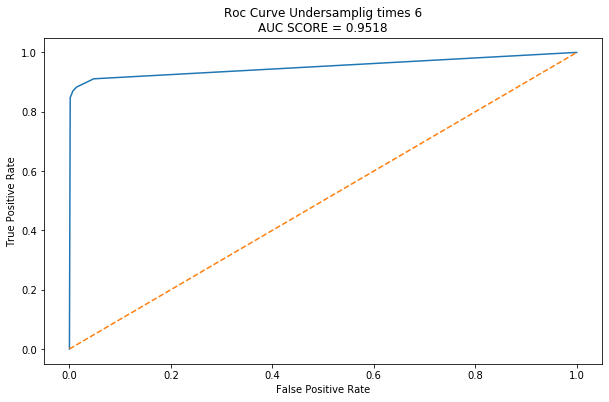

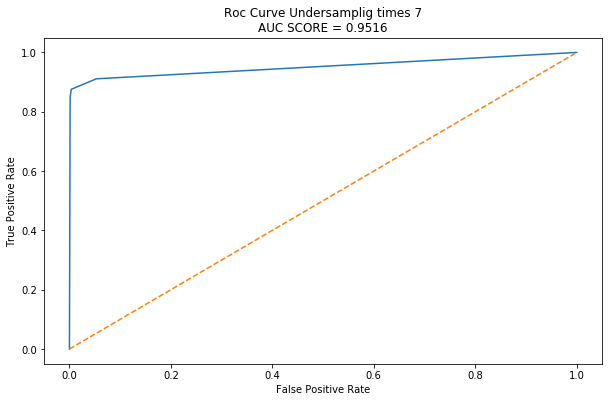

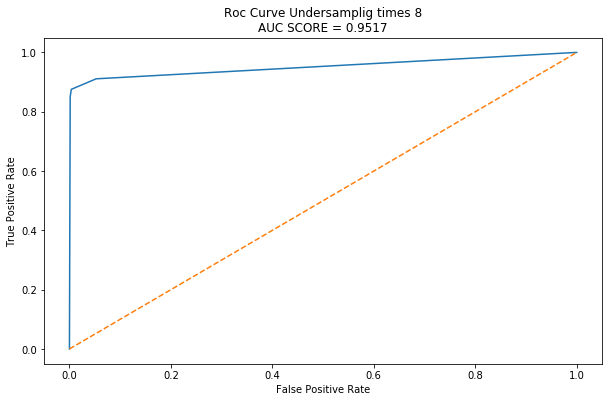

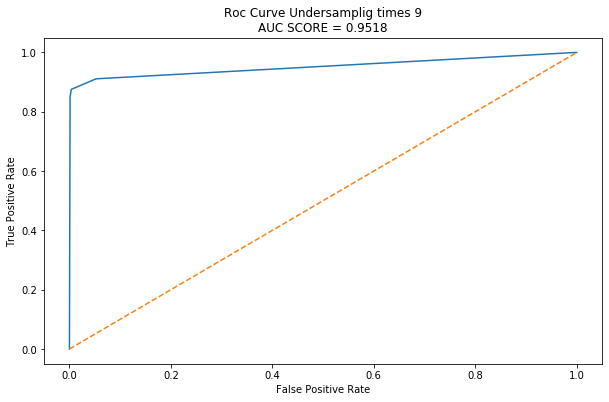

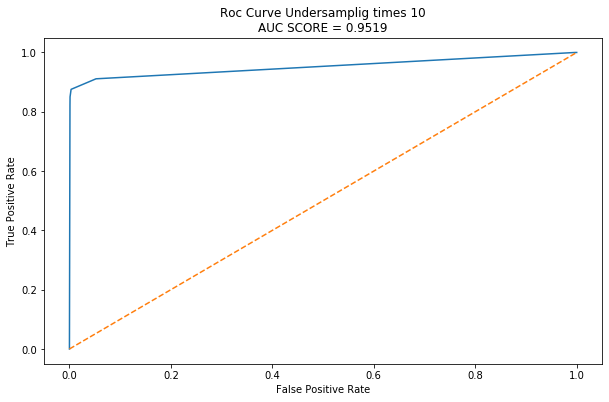

In [44]:
from sklearn.tree import DecisionTreeClassifier
import time

train_ac_scores = list()
train_f1_scores = list()
val_ac_scores = list()
val_f1_scores = list()

for times in range(1,11):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
    undersampled_X, undersampled_y = undersample(X_train, y_train, times)
    
    start_time = time.time()
    tree.fit(undersampled_X, undersampled_y)
    elapsed_time = time.time() - start_time
    metrics = important_metrics(tree, undersampled_X, undersampled_y, X_val, y_val)
    metrics["Tiempo de cómputo"] = elapsed_time
    train_ac_scores.append(metrics["Accuracy Training"])
    train_f1_scores.append(metrics["Accuracy Validation"])
    val_ac_scores.append(metrics["F1 Score Training"])
    val_f1_scores.append(metrics["F1 Score Validation"])
    
    show_metrics(metrics, "Undersampling times "+str(times))
    print(" ")
    roc_curve_graph(tree, "Undersamplig times "+str(times))
    


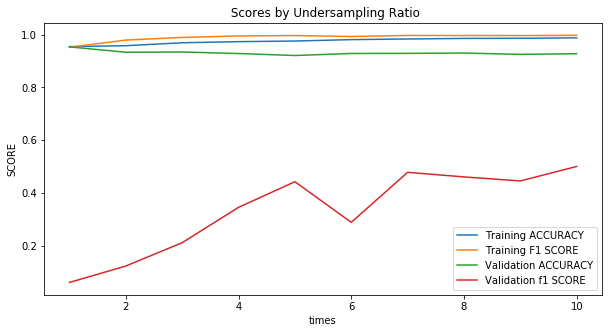

In [45]:
plt.figure(figsize=(10,5))

times = list(range(1,11))
plt.plot( times, train_ac_scores, label="Training ACCURACY") 
plt.plot( times, train_f1_scores, label="Training F1 SCORE") 
plt.plot( times, val_ac_scores, label="Validation ACCURACY") 
plt.plot( times, val_f1_scores, label="Validation f1 SCORE")

plt.xlabel("times")
plt.ylabel("SCORE")
plt.title(" Scores by Undersampling Ratio")
plt.legend()
plt.show()

#### 2.j _Oversampling_

Otra aproximación para resolver el problema de las clases desbalanceadas es hacer _oversampling_. A partir de una muestra relativamente pequeña de ejemplos, en este caso de los casos de fraude, se busca crear un conjunto de datos más grande similar al inicial, que permita al modelo aprender las caracteristicas de esa clase, buscando nuevamente obtener clases más balanceadas que originalmente, pero esta vez sin reducir la cantidad de ejemplos. Esta aproximación tiene la ventaja que no reduce la cantidad de ejemplos pero trae la complicación de decidir cómo se van a crear los datos nuevos.

Dos aproximaciones bastante estandar son SMOTE y ADASYN. Investigue un poco que hace SMOTE y que diferencia implemente ADASYN. Por qué cree puede ser deseable buscar que los datos sintéticos no sean linealmente dependientes de los datos originales? 

Elija alguno de los dos métodos e impelementelo con el árbol entrenado previamente. Comente sobre el desempeño de tal modelo. 

Medida               SMOTE KN = 5
-------------------  ----------------------
Nombre Modelo        DecisionTreeClassifier
Accuracy Training    0.9524688509460083
Accuracy Validation  0.9991046662687406
F1 Score Training    0.7706708268330733
F1 Score Validation  0.6871165644171779
Tiempo de cómputo    8.214051008224487
 
Medida               ADASIN
-------------------  ----------------------
Nombre Modelo        DecisionTreeClassifier
Accuracy Training    0.8664051684356253
Accuracy Validation  0.9991046662687406
F1 Score Training    0.7706708268330733
F1 Score Validation  0.6871165644171779
Tiempo de cómputo    8.009754180908203
 


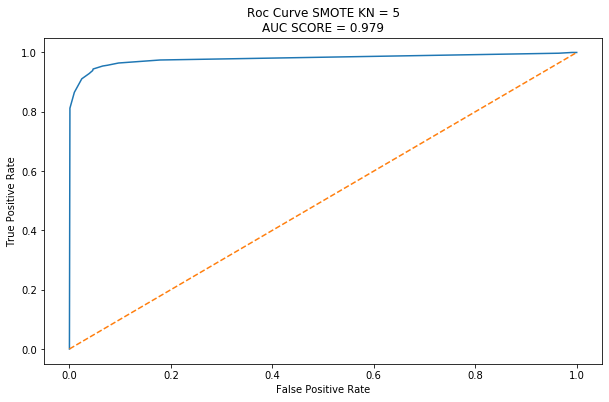

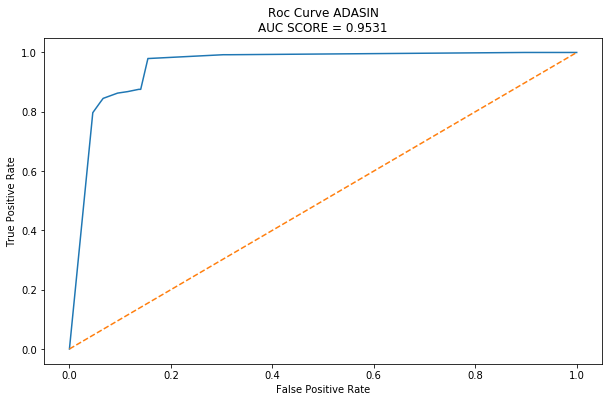

In [24]:
from imblearn.over_sampling import SMOTE, ADASYN
ada = ADASYN()
smo = SMOTE()


# SMOTE
tree = DecisionTreeClassifier(criterion='gini', max_depth=4)

x_tr_r, y_tr_r  = smo.fit_resample(X_train, y_train)
start_time = time.time()
tree.fit(x_tr_r, y_tr_r)
elapsed_time = time.time() - start_time

metrics = important_metrics(tree, x_tr_r, y_tr_r, X_val, y_val)
metrics["Tiempo de cómputo"] = elapsed_time

show_metrics(metrics, "SMOTE KN = 5")
print(" ")
roc_curve_graph(tree, "SMOTE KN = 5")
    

# ADASIN
tree = DecisionTreeClassifier(criterion='gini', max_depth=4)

x_tr_r, y_tr_r  = ada.fit_resample(X_train, y_train)
start_time = time.time()
tree.fit(x_tr_r, y_tr_r)
elapsed_time = time.time() - start_time

metrics = important_metrics(tree, x_tr_r, y_tr_r, X_val, y_val)
metrics["Tiempo de cómputo"] = elapsed_time

show_metrics(metrics, "ADASIN")
print(" ")
roc_curve_graph(tree, "ADASIN")
    

Note que tanto SMOTE como ADASYN tienen muchos parámetros que podrían afectar la calidad de los datos generados. No se requiere que elijan tales parametros (los por defecto bastan), pero se valorará un pequeño comentario sobre los parámetros de los métodos y qué representan en la heuristica utilizada. 

#### 2.k Redes neuronales _Feed Forward_ 

Por útimo, probaremos utilizar una red neuronal densa sobre los datos aumentados. Las Redes Neuronales son una herramienta muy poderosa pero comparativamente costosa frente a otros modelos. Entrenar una red neuronal puede resultar muy costos computacionalmente, por su gran numero de parámetros entrenables y por el caracter iterativo de su entrenamiento. Además, el gran numero de parámetros hace que las redes neuronales sean particularmente sensibles al _overfitting_, por lo cual suele ser necesario tener grandes cantidades de datos para poder entrenar una red neuronal obteniendo desempeños que justifiquen su costo adicional.

Por esto, entrenaremos la red neuronal sobre los datos aumentados. Básese en el código siguiente para crea la red neuronal. Explique los parámetros que se pasan en cada etapa de su creación, para esto puede leer la documentación de keras. Finalente, entrene "completamente" la red, es decir hasta que se estanque el error de validación o comience a aumentar. ¿Cómo se compara la red frente a otros modelos, tanto en desempeño como en costo? 

In [26]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(X_train.values, y_train.values, epochs=20, validation_data=(X_val,y_val))

# note that history.history gives you the values of tr and val errors and accuracies

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 227845 samples, validate on 56962 samples
Epoch 1/20
227845/227845 [==============================] - 9s 40us/step - loss: 0.0185 - acc: 0.9985 - val_loss: 0.0059 - val_acc: 0.9991
Epoch 2/20
227845/227845 [==============================] - 8s 37us/step - loss: 0.0049 - acc: 0.9992 - val_loss: 0.0045 - val_acc: 0.9991
Epoch 3/20
227845/227845 [==============================] - 9s 38us/step - loss: 0.0041 - acc: 0.9993 - val_loss: 0.0039 - val_acc: 0.9992
Epoch 4/20
227845/227845 [==============================] - 9s 38us/step - loss: 0.0037 - acc: 0.9993 - val_loss: 0.0036 - val_acc: 0.9992
Epoch 5/20
227845/227845 [==============================] - 9s 41us/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0034 - val_acc: 0.9993
Epoch 6/20
227845/227845 [==============================] - 9s 41us/step - loss: 0.0033 - acc: 0.9993 - val_loss: 0.0033 - val_acc: 0.9993
Epoch 7/20
2278

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7680      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________


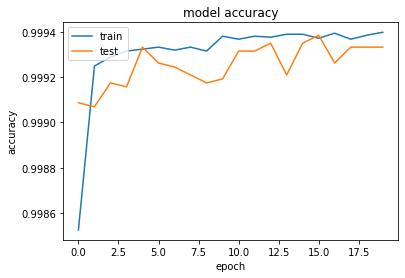

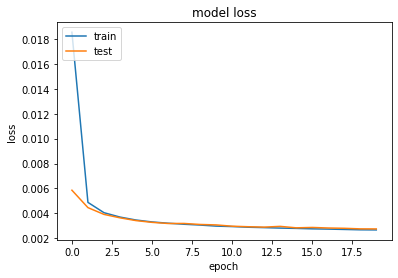

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
metrics = dict()
metrics["Nombre Modelo"] = type(model).__name__
f = lambda x: int(round(x,0))
metrics["Accuracy Training"] = accuracy_score(list(map(f,list(model.predict(X_train)))), y_train)
metrics["Accuracy Validation"] = accuracy_score(list(map(f,list(model.predict(X_train)))), y_val)
metrics["F1 Score Training"] = f1_score(list(map(f,list(model.predict(X_train)))), y_train)
metrics["F1 Score Validation"] = f1_score(list(map(f,list(model.predict(X_train)))), y_val) 
show_metrics(metrics, "FFNN")                      

TypeError: type numpy.ndarray doesn't define __round__ method